In [12]:


%load_ext autoreload
%autoreload 2
import pandas as pd
import MDAnalysis as mda
from utils import utils
import seaborn as sns
import matplotlib.pyplot as plt
import sbmlcore
import json
import os
import sys

sys.path.append(os.path.abspath('ml-models'))
from mlmodels.Models import Models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Feature Dataset Import

In [16]:
data = pd.read_csv('./data/tables/generated/features_dataset.csv', index_col=0)

#extract features
features = data[data.columns[4:]]
#extract mutations and labels
labels = data[data.columns[:4]]

features

,d_volume,d_hydropathy_KD,d_MW,d_pi,d_rogov,Rif_distance,Mg_distance,Zn1_distance,Zn2_distance,antisense_P_distance,...,temp_factor,Rif_min_distance,Mg_min_distance,Zn1_min_distance,Zn2_min_distance,antisense_P_min_distance,RNA_min_distance,mean_phi,mean_psi,secondary_structure
2,-27.3,0.0,-14.0,-0.45,0.109,34.015193,46.989545,87.166478,75.548089,55.623614,...,41.400002,32.398593,46.038218,86.959443,72.279360,51.151947,42.275598,-93.369233,-20.024702,0
3,26.7,0.3,14.1,0.06,0.494,24.626817,41.825588,78.262390,57.362562,45.086377,...,36.919998,21.736677,39.482342,75.763734,53.560955,39.285029,33.699031,-60.411471,-33.459681,1
4,28.9,-0.4,30.0,-0.29,0.120,42.448172,53.093099,94.241454,82.538298,64.371499,...,32.490002,40.799796,51.833114,94.069735,78.792626,59.842361,49.009863,22.946413,-155.697465,2
5,-26.7,-0.3,-14.1,-0.06,0.494,27.986912,38.493729,67.273466,37.702159,41.556539,...,19.900000,24.936656,37.996169,64.407775,34.255279,35.106592,32.315447,-144.714133,148.649884,2
6,-54.5,0.4,-14.1,-4.33,0.197,59.941562,53.890413,88.529532,110.782258,74.331578,...,86.489998,54.022245,49.511935,88.429960,106.835526,69.617671,52.185349,55.856385,20.543887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,36.7,6.0,10.0,-2.11,-0.016,9.683248,25.781296,62.965378,60.794759,30.999135,...,16.459999,7.818147,24.649392,61.053218,60.018633,25.919643,19.380805,-73.606848,-39.475197,1
263,3.8,2.6,-18.0,0.28,-0.452,9.843524,27.300241,63.742282,55.067065,31.789556,...,17.299999,6.959772,25.525949,61.429328,53.765220,25.613549,19.405567,-74.641870,137.553994,3
264,-51.4,-2.4,-28.0,0.04,0.232,56.595298,69.461383,76.087975,80.241269,46.536821,...,133.350006,56.504732,68.031156,62.596191,74.290668,45.068224,64.342506,-123.647188,-17.394655,3
265,-0.4,2.6,-16.0,0.32,0.249,18.638826,26.587542,64.049947,71.927826,35.219514,...,18.350000,15.642925,23.524223,61.807004,71.149683,30.284239,21.147248,-94.405096,114.374256,0


# Feature Inspection 

We do not have an label split, and may have to consider upscaling our resistant samples when training our models:

In [20]:
pd.DataFrame(data.phenotype.value_counts())

,count
phenotype,
0,219
1,46


### Many Features Are Correlated with Oneanother

In [23]:
#only plot static features for clarity
features.drop(columns=[i for i in features.columns if 'min' in i or 'mean' in i], inplace=True)

/var/folders/s5/pshvb2093574r5hqnwcy6klw0000gn/T/ipykernel_76203/519070991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(columns=[i for i in features.columns if 'min' in i or 'mean' in i], inplace=True)


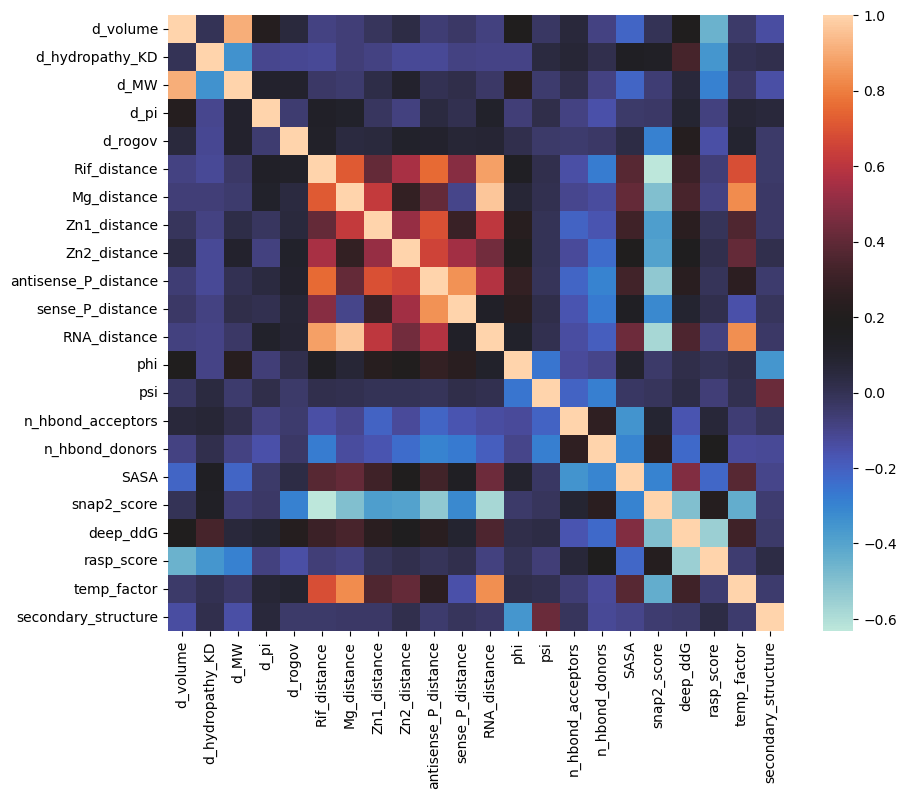

In [24]:
plt.subplots(figsize=(10,8))
sns.heatmap(features.corr(), xticklabels=True, yticklabels=True, square=True, cmap='icefire')
plt.savefig('./imgs/Pearson-correlation-matrix.pdf', bbox_inches='tight', transparent='True', dpi=900, format='pdf')